In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import cifar10
from resnet_model import *

## load cifar10 data

In [31]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
num_classes = 10
input_shape = X_train[0].shape
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)


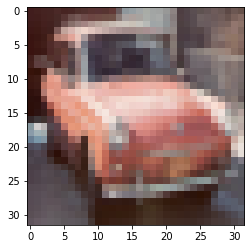

1


In [33]:
num = 64
plt.imshow(X_train[num])
plt.show()
print(np.argmax(Y_train[num]))

In [45]:
model = ResNet34(input_shape=input_shape, num_classes=num_classes, activation='elu')
model.summary()

Model: "resnet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 32, 64)   9472        ['input_10[0][0]']               
                                                                                                  
 batch_norm1 (BatchNormalizatio  (None, 32, 32, 64)  256         ['conv1[0][0]']                  
 n)                                                                                               
                                                                                                  
 activation1 (Activation)       (None, 32, 32, 64)   0           ['batch_norm1[0][0]']     

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 14s 38ms/step - loss: 1.8080 - accuracy: 0.3994 - val_loss: 2.2778 - val_accuracy: 0.2766
Epoch 2/20
313/313 [==============================] - 11s 37ms/step - loss: 1.2541 - accuracy: 0.5530 - val_loss: 2.4144 - val_accuracy: 0.3407
Epoch 3/20
313/313 [==============================] - 11s 37ms/step - loss: 1.0210 - accuracy: 0.6431 - val_loss: 1.5975 - val_accuracy: 0.5013
Epoch 4/20
313/313 [==============================] - 11s 37ms/step - loss: 0.8589 - accuracy: 0.7009 - val_loss: 1.2603 - val_accuracy: 0.5899
Epoch 5/20
313/313 [==============================] - 11s 37ms/step - loss: 0.7352 - accuracy: 0.7435 - val_loss: 1.3414 - val_accuracy: 0.5591
Epoch 6/20
313/313 [==============================] - 11s 37ms/step - loss: 0.6379 - accuracy: 0.7780 - val_loss: 1.0269 - val_accuracy: 0.6731
Epoch 7/20
313/313 [==============================] - 11s 37ms/step - loss: 0.5437 - accuracy: 0.8116 - val_loss: 1.0543 - val_accuracy:

In [47]:
model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 1.6452 - accuracy: 0.7221


[1.6451905965805054, 0.722100019454956]